In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("data.csv", delimiter=";")

enrolled_mask = data["Target"] == "Enrolled"

enrolled_students = data[enrolled_mask]
unenrolled_students = data[~enrolled_mask]

X_unenrolled = unenrolled_students.drop("Target", axis=1)
y_unenrolled = unenrolled_students["Target"]

X_enrolled = enrolled_students.drop("Target", axis=1)
y_enrolled = enrolled_students["Target"]

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

one_hot_columns = [
    "Marital status",
    "Application mode",
    "Course",
    "Previous qualification (grade)",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
]

numeric_columns = [col for col in X_unenrolled.columns if col not in one_hot_columns]

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", encoder, one_hot_columns),
        ("num", StandardScaler(), numeric_columns)
    ]
)


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("classifier", KNeighborsClassifier())
])

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1'
)

grid_search.fit(X_unenrolled, y_unenrolled)


print(f"Best n_neighbors: {grid_search.best_params_['classifier__n_neighbors']}")
print(f"Best CV accuracy: {grid_search.best_score_:.3f}")


/home/david/miniforge3/envs/ds/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/david/miniforge3/envs/ds/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/david/miniforge3/envs/ds/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/david/miniforge3/envs/ds/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/david/minif

Best n_neighbors: 3
Best CV accuracy: nan


In [6]:
data.loc[enrolled_mask, "Target"] = grid_search.predict(X_enrolled)

/tmp/ipykernel_17895/3344976523.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


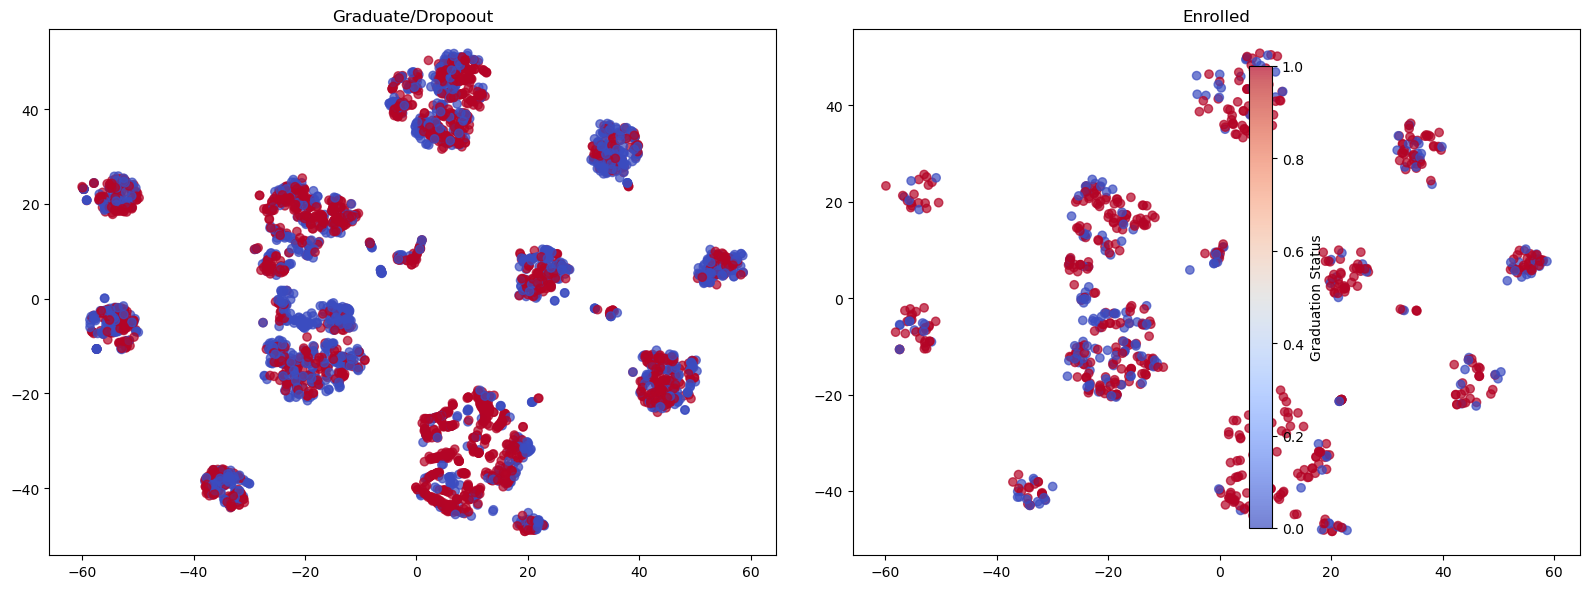

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=75)
X_tsne = tsne.fit_transform(data.drop("Target", axis=1))

binary_labels_enrolled = (data.loc[enrolled_mask, "Target"] == "Graduate").astype(int)

binary_labels_unenrolled = (data.loc[~enrolled_mask, "Target"] == "Graduate").astype(int)


# Visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].scatter(X_tsne[~enrolled_mask, 0], X_tsne[~enrolled_mask, 1], 
              c=binary_labels_unenrolled, cmap='coolwarm', alpha=0.7)
axs[0].set_title('Graduate/Dropoout')

axs[1].scatter(X_tsne[enrolled_mask, 0], X_tsne[enrolled_mask, 1], 
              c=binary_labels_enrolled, cmap='coolwarm', alpha=0.7)
axs[1].set_title('Enrolled')

plt.colorbar(axs[0].collections[0], ax=axs, label='Graduation Status')
plt.tight_layout()

In [16]:
data.loc[~enrolled_mask, "Target"].value_counts(normalize=True)

Target
Graduate    0.60854
Dropout     0.39146
Name: proportion, dtype: float64

In [17]:
data.loc[enrolled_mask, "Target"].value_counts(normalize=True)

Target
Graduate    0.711587
Dropout     0.288413
Name: proportion, dtype: float64

In [39]:
data.to_csv('data_prepped.csv', index=False)

In [5]:
data = pd.read_csv("data.csv", delimiter=";")
data = data[data["Target"] != "Enrolled"]
data.to_csv('data_prepped_r.csv', index=False)